# Hyperpool 

#### Results on the `pol_godziny` experiment reported to the first and second round in `npj`


result raw data available at `https://doi.org/10.5281/zenodo.12721529`

April 2024

------


### 0. Imports

In [1]:
import os
import pandas as pd

In [2]:
from numpy.random import normal

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
os.chdir("/Users/rafalkucharski/PycharmProjects/ExMAS")
import ExMAS.main
import ExMAS.utils
from ExMAS.hyperpool import *

In [5]:
import seaborn as sns

In [6]:
from ExMAS.hyperpool.main import stick_private_to_ms

In [7]:
import json
from ExMAS.utils import *

In [8]:
import matplotlib.pyplot as plt

In [9]:
from ExMAS.hyperpool import visualizations
from ExMAS.hyperpool import analysis

In [10]:
plt.style.use(['science', 'no-latex'])
os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin'

### 1. Config and data load

In [11]:
params = ExMAS.utils.get_config('ExMAS/data/configs/transit.json')  # load the default

In [12]:
inData = analysis.load_results(PATH ='transit_results/pol_godziny', EXP_NAME = 'pol_godziny') # replace with data dwonloaded from https://doi.org/10.5281/zenodo.12721529

In [13]:
inData.transitize.requests = analysis.PT_utility(inData.transitize.requests, params)

In [14]:
inData = ExMAS.utils.load_G(inData, params, stats=True)  # download the graph

In [15]:
inData.skims = DotMap(_dynamic=False)  # skim matrices of the network
inData.skims.dist = inData.skim.copy()  # distance (meters)
inData.skims.ride = inData.skims.dist.divide(params.speeds.ride).astype(int).T  # travel time (seconds)
inData.skims.walk = inData.skims.dist.divide(params.speeds.walk).astype(int).T  # walking time (seconds)

In [16]:
from ExMAS.main import init_log
params.logger_level = 'WARNING'
inData.logger = init_log(params)

In [17]:
#inData = stick_private_to_ms(inData, params)
# optional - time consuming. what if our private rides are now offered a participation in existing hypoerpooled rides

In [18]:
#r = inData.transitize.requests
#r[r.ride_solution_4 != r.ride_solution_3]

## Table 2 Rides composition

In [19]:
inData = analysis.make_report(inData)
inData.transitize.report

,0,1,2,3
d2d,NaN,1345.0,1184.0,1065.0
dest_walk_time,0.0,0.0,39147.0,67746.0
fare,11848.803,9102.147,8702.988222,8053.17383
ms,NaN,NaN,NaN,225.0
nRides,2000,159702,160239,1009855
orig_walk_time,0.0,0.0,42728.0,72134.0
p,2000.0,655.0,645.0,651.0
s2s,NaN,NaN,171.0,59.0
test,True,True,True,True
ttrav,986517.0,1304161.0,1217568.875,1051353.625


In [21]:
report = inData.transitize.report
report.columns = ['private','door-to-door pooled','stop-to-stop pooled','hyper-pooled']
compos = report.loc[['p','d2d','s2s','ms','nRides']].fillna(0).astype(int).T
compos.columns = ['private','door-to-door pooled','stop-to-stop pooled','hyper-pooled','$\#$rides']
compos.index.name = 'solution'
compos.style.set_caption("Rides composition")

,private,door-to-door pooled,stop-to-stop pooled,hyper-pooled,$\#$rides
solution,,,,,
private,2000,0,0,0,2000
door-to-door pooled,655,1345,0,0,159702
stop-to-stop pooled,645,1184,171,0,160239
hyper-pooled,651,1065,59,225,1009855


In [22]:
print(compos.to_latex())

\begin{tabular}{lrrrrr}
\toprule
 & private & door-to-door pooled & stop-to-stop pooled & hyper-pooled & $\#$rides \\
solution &  &  &  &  &  \\
\midrule
private & 2000 & 0 & 0 & 0 & 2000 \\
door-to-door pooled & 655 & 1345 & 0 & 0 & 159702 \\
stop-to-stop pooled & 645 & 1184 & 171 & 0 & 160239 \\
hyper-pooled & 651 & 1065 & 59 & 225 & 1009855 \\
\bottomrule
\end{tabular}



In [23]:
rm = inData.transitize.rm
ms = rm[(rm.kind=='ms') & (rm.solution_3==1)]
ms

,ride,traveller,degree,dist,ttrav,delay,u,orig_walk_time,dest_walk_time,VoT,...,destination,treq,kind,s2s_reference,door_departure,fare,solution_0,solution_1,solution_2,solution_3
1477,160260,1477,4.0,6102,687.0,187.5,6.533073,274.0,199.0,0.002876,...,1578757568,1394,ms,160142.0,1581.5,2.288250,0,0,0,1
1776,160260,1776,4.0,6117,687.0,145.5,7.584394,66.0,373.0,0.003815,...,46322001,1644,ms,160142.0,1789.5,2.293875,0,0,0,1
1623,160260,1623,4.0,7548,846.0,523.5,12.445932,450.0,368.0,0.003941,...,46179537,1542,ms,160161.0,2065.5,2.830500,0,0,0,1
1970,160260,1970,4.0,6331,846.0,388.5,11.923214,298.0,0.0,0.005484,...,46178576,1829,ms,160161.0,2217.5,2.374125,0,0,0,1
234,161743,234,4.0,6380,665.0,506.0,10.207418,404.0,415.0,0.003523,...,7602202566,255,ms,159983.0,761.0,2.392500,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,785769,455,10.0,4115,576.0,574.0,9.228761,233.0,350.0,0.003893,...,46338006,395,ms,159760.0,969.0,1.543125,0,0,0,1
480,785769,480,10.0,9488,1424.0,131.0,12.283304,393.0,151.0,0.003821,...,46201004,403,ms,159775.0,534.0,3.558000,0,0,0,1
388,785769,388,10.0,10578,1424.0,129.0,11.258697,426.0,194.0,0.003094,...,46205852,372,ms,159775.0,501.0,3.966750,0,0,0,1
546,785769,546,10.0,8123,1106.0,272.0,10.461803,308.0,280.0,0.003427,...,46283291,434,ms,159782.0,706.0,3.046125,0,0,0,1


In [24]:
nP = 2000
from math import comb, factorial
c=comb(2000,14)
c = c*factorial(14)*factorial(14)
"{:e}".format(c)

'1.364656e+57'

### Table 3

In [25]:
pd.set_option('display.precision', 3)
report = report.T
report['walk_time'] = report['orig_walk_time']+report['dest_walk_time']
report = report.T

KPIs = report.loc[['u_veh','u_pax','ttrav','walk_time','nRides', 'fare', 'efficiency','occupancy']].fillna(0).T
for col in ['u_veh','ttrav', 'walk_time']:
    KPIs[col] = (KPIs[col]/3600).round(3)/2000
for col in ['u_pax']:
    KPIs[col] = - KPIs[col].round(3)/2000
for col in ['fare']:
    KPIs[col] = KPIs[col].round(3)/2000
for col in ['nRides']:
    KPIs[col] = KPIs[col].astype(int)
for col in ['efficiency','occupancy']:
    KPIs[col] = KPIs[col].round(3)
KPIs.u_veh = KPIs.u_veh
KPIs.columns = ['vehicle hours','travellers costs (utility)','passenger in-vehicle hours',
                'walk time ', 'feasible rides', 'fare', 
                'fares per veh hours', 'occupancy']

KPIs.index.name = 'solution'
KPIs.style.set_caption("KPIs")

,vehicle hours,travellers costs (utility),passenger in-vehicle hours,walk time,feasible rides,fare,fares per veh hours,occupancy
solution,,,,,,,,
private,0.137016,-7.644921,0.137016,0.000000,2000,5.924402,43.239000,1.000000
door-to-door pooled,0.089562,-7.317717,0.181134,0.000000,159702,4.551074,50.815000,1.530000
stop-to-stop pooled,0.088038,-7.188078,0.169107,0.011371,160239,4.351494,49.428000,1.556000
hyper-pooled,0.085611,-6.649290,0.146021,0.019428,1009855,4.026587,47.033000,1.600000


In [26]:
#KPIs[KPIs.columns[1]] = -KPIs[KPIs.columns[1]]

In [27]:
print(KPIs.to_latex())

\begin{tabular}{lrrrrrrrr}
\toprule
 & vehicle hours & travellers costs (utility) & passenger in-vehicle hours & walk time  & feasible rides & fare & fares per veh hours & occupancy \\
solution &  &  &  &  &  &  &  &  \\
\midrule
private & 0.137016 & -7.644921 & 0.137016 & 0.000000 & 2000 & 5.924402 & 43.239000 & 1.000000 \\
door-to-door pooled & 0.089562 & -7.317717 & 0.181134 & 0.000000 & 159702 & 4.551074 & 50.815000 & 1.530000 \\
stop-to-stop pooled & 0.088038 & -7.188078 & 0.169107 & 0.011371 & 160239 & 4.351494 & 49.428000 & 1.556000 \\
hyper-pooled & 0.085611 & -6.649290 & 0.146021 & 0.019428 & 1009855 & 4.026587 & 47.033000 & 1.600000 \\
\bottomrule
\end{tabular}



In [28]:
inData.transitize.rm['selected'] = inData.transitize.rm[['solution_0','solution_1','solution_2','solution_3']].max(axis=1)

In [29]:
requests = inData.transitize.requests
rm = inData.transitize.rm[inData.transitize.rm.selected==1]

In [30]:
ttrav_ms = rm[rm.kind=='ms'].ttrav.sum()
ttrav_p = rm[(rm.kind=='p') & (rm.traveller.isin(rm[rm.kind=='ms'].traveller))].ttrav.sum()
u_veh = inData.transitize.rides[(inData.transitize.rides.solution_3==1) &(inData.transitize.rides.kind=='ms')].u_veh.sum()

In [31]:
requests['fare_3'] = requests.apply(lambda x: rm[(rm.ride==x.ride_solution_3) & (rm.traveller == x.name)].fare.max(), axis = 1)
requests['fare_2'] = requests.apply(lambda x: rm[(rm.ride==x.ride_solution_2) & (rm.traveller == x.name)].fare.max(), axis = 1)
requests['u_3'] = requests.apply(lambda x: rm[(rm.ride==x.ride_solution_3) & (rm.traveller == x.name)].u.max(), axis = 1)
requests['u_2'] = requests.apply(lambda x: rm[(rm.ride==x.ride_solution_2) & (rm.traveller == x.name)].u.max(), axis = 1)
requests['u_1'] = requests.apply(lambda x: rm[(rm.ride==x.ride_solution_1) & (rm.traveller == x.name)].u.max(), axis = 1)
requests['u_0'] = requests.apply(lambda x: rm[(rm.ride==x.ride_solution_1) & (rm.traveller == x.name)].u.max(), axis = 1)

In [34]:
d = dict()
d['p'] = 'private'
d['s2s'] = 'stop-to-stop'
d['d2d'] = 'door-to-door'
d['ms']= 'hyper-pooled'
inData.transitize.rides['kind_2'] = inData.transitize.rides['kind'].apply(lambda x: d[x])

### Figure 4

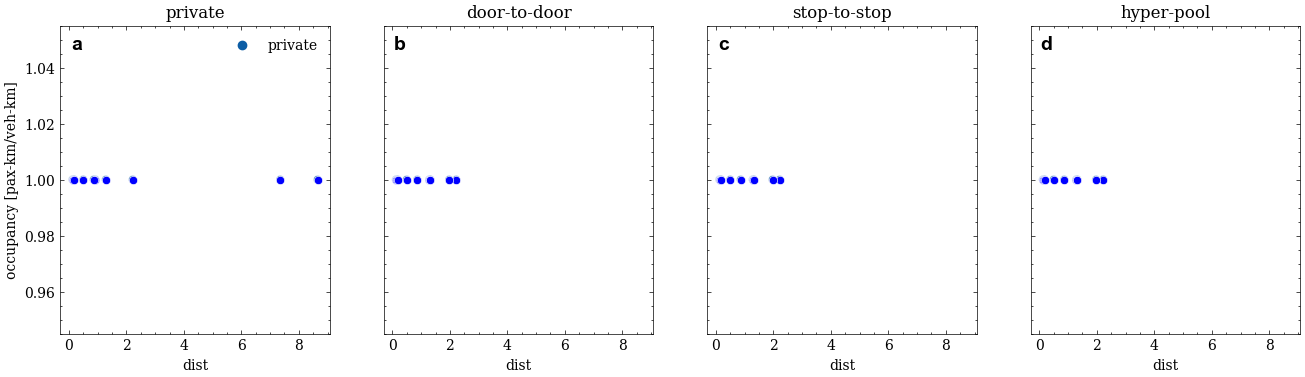

In [83]:
fig, ax = plt.subplots(1,4, figsize = (16,4), sharey = True, sharex= True)
ax = ax.flatten()
Y = 'occupancy [pax-km/veh-km]'
titles = ['private','door-to-door','stop-to-stop','hyper-pool']
for level in [0,1,2,3]:
    solution = inData.transitize.rides[inData.transitize.rides['solution_{}'.format(level)] ==1]
    solution['ttrav_total'] = solution.apply(lambda x: inData.transitize.rm[inData.transitize.rm.ride == x.name].ttrav.sum(),axis = 1)
    solution[Y] = solution['ttrav_total'] / solution['u_veh']
    solution['dist'] = solution.u_veh/1000*params.avg_speed
    sns.scatterplot(data = solution, x = 'dist', y = Y, hue = 'kind_2' , 
                    ax = ax[level])
    sns.scatterplot(data = solution[solution.kind_2 == 'private'], x = 'dist', y = Y,
                    ax = ax[level], color = 'blue')
    ax[level].set_title(titles[level])
    if level != 3:
        ax[level].get_legend().remove()
for i, label in enumerate(('a', 'b', 'c', 'd')):
    ax[i].text(0.07, 0.97, label, transform=ax[i].transAxes,
      fontsize=14, fontweight='bold', va='top', ha='right', fontfamily = 'Arial')
plt.savefig('figure_4.png',dpi = 300)

### Figure 5

In [84]:
rm

,ride,traveller,degree,dist,ttrav,delay,u,orig_walk_time,dest_walk_time,VoT,...,door_departure,fare,solution_0,solution_1,solution_2,solution_3,selected,u_PT,value of time [€/hour],kind_2
"(0, 0)",0,0,1.0,1717,214.0,0.0,3.671,NaN,NaN,0.005,...,NaN,2.575,1,1,1,1,1,5.902,18.421,private
"(1, 1)",1,1,1.0,169,21.0,0.0,0.325,NaN,NaN,0.003,...,NaN,0.254,1,1,1,1,1,1.577,12.236,private
"(2, 2)",2,2,1.0,667,83.0,0.0,1.375,NaN,NaN,0.005,...,NaN,1.000,1,1,1,1,1,3.973,16.232,private
"(3, 3)",3,3,1.0,204,25.0,0.0,0.382,NaN,NaN,0.003,...,NaN,0.306,1,1,1,1,1,1.619,10.910,private
"(4, 4)",4,4,1.0,11537,1442.0,0.0,23.502,NaN,NaN,0.004,...,NaN,17.305,1,0,0,0,1,23.539,15.469,private
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,785769,455,10.0,4115,576.0,574.0,9.229,233.0,350.0,0.004,...,969.0,1.543,0,0,0,1,1,11.345,14.014,hyper-pooled
480,785769,480,10.0,9488,1424.0,131.0,12.283,393.0,151.0,0.004,...,534.0,3.558,0,0,0,1,1,18.006,13.757,hyper-pooled
388,785769,388,10.0,10578,1424.0,129.0,11.259,426.0,194.0,0.003,...,501.0,3.967,0,0,0,1,1,16.391,11.139,hyper-pooled
546,785769,546,10.0,8123,1106.0,272.0,10.462,308.0,280.0,0.003,...,706.0,3.046,0,0,0,1,1,15.240,12.339,hyper-pooled


In [85]:
rm.columns

Index(['ride', 'traveller', 'degree', 'dist', 'ttrav', 'delay', 'u',
       'orig_walk_time', 'dest_walk_time', 'VoT', 'origin', 'destination',
       'treq', 'kind', 's2s_reference', 'door_departure', 'fare', 'solution_0',
       'solution_1', 'solution_2', 'solution_3', 'selected', 'u_PT',
       'value of time [€/hour]', 'kind_2'],
      dtype='object')

In [87]:
X = 'value of time [€/hour]'
rm = inData.transitize.rm[inData.transitize.rm.selected>0]
rm['u_PT'] = rm.apply(lambda x: inData.transitize.requests.loc[x.traveller].u_PT, axis=1)
rm[X] = rm.VoT*3600
rm['kind_2'] = rm['kind'].apply(lambda x: d[x])
fig, ax = plt.subplots(1,4, figsize = (16,6), sharey = True, sharex = True)
ax = ax.flatten()
titles = ['private','door-to-door','stop-to-stop','hyper-pool']
panel_labels = ['a','b','c','d']
for level in [0,1,2,3]:

    solution = rm[rm['solution_{}'.format(level)] ==1].copy()
    #solution[solution.kind == 'ms'].u = solution[solution.kind == 'ms'].apply(lambda x: utility_s2s(x), axis =1) 
    solution['u_private'] = solution.apply(lambda x: rm[(rm.kind=='p')& (rm.traveller == x.traveller)].u.max(), axis =1)
    solution['$\Delta U$'] = np.minimum(0,(solution.u - solution.u_private ) / solution.u_private)
    solution['$\Delta U_{PT}$'] = np.minimum(3,(solution.u_PT - solution.u_private ) / solution.u_private)
    sns.scatterplot(data = solution, x = X, y = '$\Delta U_{PT}$',
                    ax = ax[level], alpha = 0.1, color="grey", label = 'PT')
    ax[0].set_ylabel('$\Delta U$')
    sns.scatterplot(data = solution, x = X, y = '$\Delta U$', hue = 'kind_2' , 
                    ax = ax[level])

    sns.scatterplot(data = solution[solution.kind_2 == 'private'], x = X, y = '$\Delta U$',
                    ax = ax[level], color = 'blue')
    
    
    ax[level].set_title(titles[level])
    if level <3:
        ax[level].get_legend().remove()
    ax[level].set_ylim([-1,1])
    ax[level].text(0.07, 0.98, panel_labels[level], transform=ax[level].transAxes, fontfamily = 'Arial',
      fontsize=14, fontweight='bold', va='top', ha='right', )

plt.savefig('figure_5.png',dpi = 300)


In [72]:
level = 3
solution = inData.transitize.rides[inData.transitize.rides['solution_{}'.format(level)] ==1]
solution['ttrav'] = solution.times.apply(lambda x: sum(x[1:-1]) if len(x)>2 else x[-1])

### Figure 6

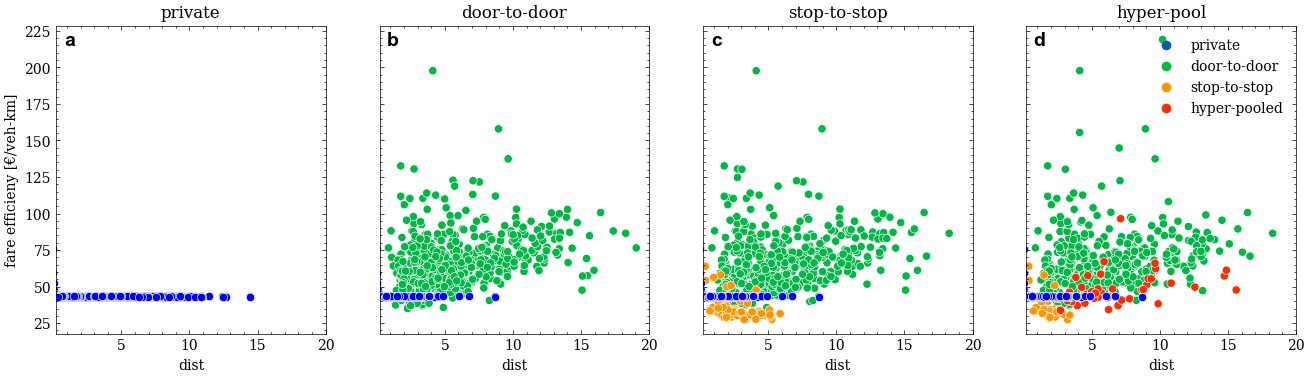

In [ ]:
fig, ax = plt.subplots(1,4, figsize = (16,4), sharey = True, sharex= True)
Y = 'fare efficieny [€/veh-km]'
ax = ax.flatten()
titles = ['private','door-to-door','stop-to-stop','hyper-pool']
for level in [0,1,2,3]:
    solution = inData.transitize.rides[inData.transitize.rides['solution_{}'.format(level)] ==1]
    solution['ttrav'] = solution.times.apply(lambda x: sum(x[1:-1]) if len(x)>2 else x[-1])#solution['ttrav_total'] = solution.apply(lambda x: inData.transitize.rm[inData.transitize.rm.ride == x.name].ttrav.sum(),axis = 1)
    solution[Y] = solution['fare'] /solution['ttrav'] * 3600
    solution['dist'] = solution.u_veh/1000*params.avg_speed
    sns.scatterplot(data = solution, x = 'dist', y = Y, hue = 'kind_2' , 
                    ax = ax[level])
    sns.scatterplot(data = solution[solution.kind_2 == 'private'], x = 'dist', y = Y,
                    ax = ax[level], color = 'blue')
    ax[level].set_title(titles[level])
    ax[level].set_xlim(0.2,20)
    if level <3:
        ax[level].get_legend().remove()
    ax[level].text(0.07, 0.98, panel_labels[level], transform=ax[level].transAxes, fontfamily = 'Arial',
      fontsize=14, fontweight='bold', va='top', ha='right', )
plt.savefig('figure_6.png',dpi = 300)

---

# New

#### Walking distance distirbutions

(0.0, 600.0)

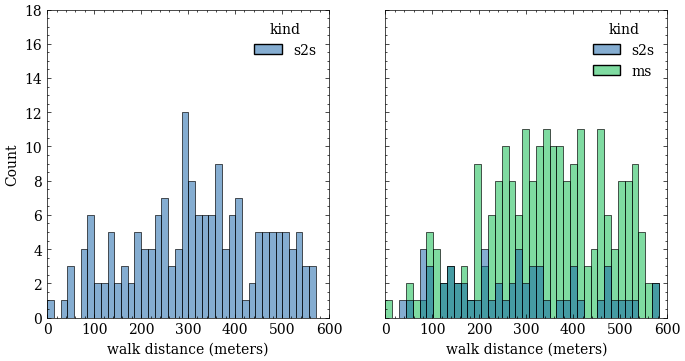

In [54]:
fig, ax = plt.subplots(1,2, figsize = (8,4), sharey = True, sharex= True)
rm['walk distance (meters)'] = (rm["orig_walk_time"] + rm["dest_walk_time"])/1.5
sns.histplot(data = rm[(rm.solution_2 == 1) & (rm.kind == 's2s')], x = 'walk distance (meters)', kde=False, hue = 'kind', ax = ax[0], bins = 40)
sns.histplot(data = rm[(rm.solution_3 == 1) & (rm.kind.isin(['s2s','ms']))], x = 'walk distance (meters)', hue = 'kind', ax = ax[1], bins = 40)
ax[0].set_ylim([0,18])
ax[0].set_xlim([0,600])
ax[0].set_xlim([0,600])


----

### Sensitivity analysis

In [55]:
df = inData.transitize.rm[inData.transitize.rm['solution_{}'.format(3)] ==1]
df = df[df.kind=='ms']
loc_rm = rm[rm.solution_0 == 1]
df['u_private'] = df.apply(lambda x: loc_rm[(loc_rm.traveller == x.traveller) &(loc_rm.kind=='p') ].u.iloc[0], axis =1)
df = df[(df.u-df.u_private)<-0.3]
loc_rm = rm[rm.solution_1 == 1]
df['u_d2d'] = df.apply(lambda x: loc_rm[(loc_rm.traveller == x.traveller) &(loc_rm.kind=='d2d')].u.min(), axis =1)
df['u_ms_multiplier']=params.price * (1 - params.multistop_discount) + \
                        df.VoT * (params.walk_discomfort * (df.orig_walk_time + df.dest_walk_time) +
                                       params.multi_stop_WtS * df.ttrav +
                                       params.delay_value * df.delay)
df['u_PT']=df.apply(lambda x: inData.transitize.requests.loc[x.traveller].u_PT, axis = 1)
df['attractive_PT'] = df['u_ms_multiplier']<=df['u_PT']



In [56]:
df

,ride,traveller,degree,dist,ttrav,delay,u,orig_walk_time,dest_walk_time,VoT,...,solution_0,solution_1,solution_2,solution_3,selected,u_private,u_d2d,u_ms_multiplier,u_PT,attractive_PT
1477,160260,1477,4.0,6102,687.0,187.5,6.533,274.0,199.0,0.003,...,0,0,0,1,1,11.344,10.592,4.358,9.394,True
1776,160260,1776,4.0,6117,687.0,145.5,7.584,66.0,373.0,0.004,...,0,0,0,1,1,12.090,11.127,5.337,11.998,True
1623,160260,1623,4.0,7548,846.0,523.5,12.446,450.0,368.0,0.004,...,0,0,0,1,1,15.039,15.028,9.409,13.931,True
1970,160260,1970,4.0,6331,846.0,388.5,11.923,298.0,0.0,0.005,...,0,0,0,1,1,13.834,13.703,9.205,19.288,True
234,161743,234,4.0,6380,665.0,506.0,10.207,404.0,415.0,0.004,...,0,0,0,1,1,12.378,12.238,7.742,13.279,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,785769,610,10.0,10176,1607.0,247.0,13.192,127.0,389.0,0.004,...,0,0,0,1,1,19.834,19.825,9.067,13.625,True
480,785769,480,10.0,9488,1424.0,131.0,12.283,393.0,151.0,0.004,...,0,0,0,1,1,18.764,18.381,8.496,18.006,True
388,785769,388,10.0,10578,1424.0,129.0,11.259,426.0,194.0,0.003,...,0,0,0,1,1,19.957,18.869,7.178,16.391,True
546,785769,546,10.0,8123,1106.0,272.0,10.462,308.0,280.0,0.003,...,0,0,0,1,1,15.663,14.487,7.300,15.240,True


In [57]:
df.VoT.mean()

0.0031911096711707532

In [58]:
params.price

1.5

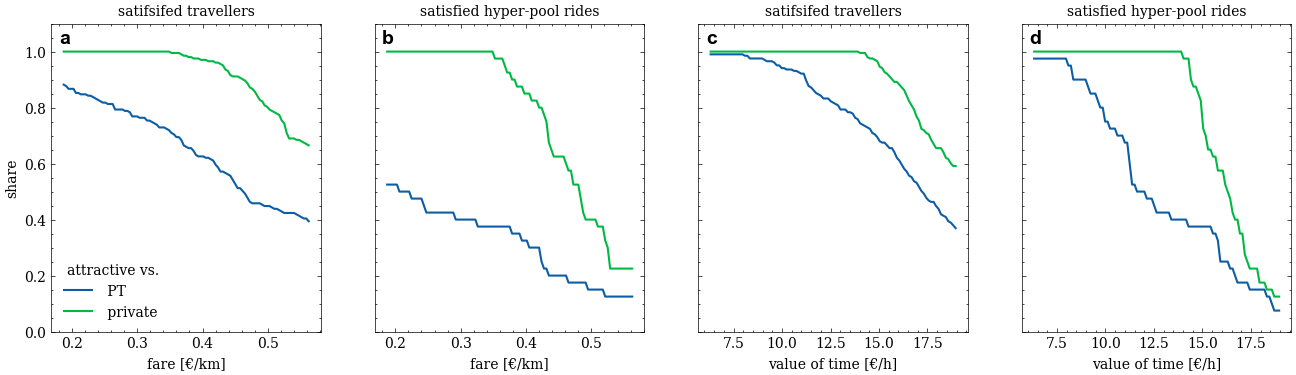

In [80]:
from matplotlib.ticker import FormatStrFormatter
fig, ax = plt.subplots(1,4, figsize = (16,4), sharey = True)
ax = ax.flatten()
res = dict()
for multiplier in np.linspace(0.5,1.5,101):
    #df['u_ms_multiplier'] = df['u'] + df.fare*multiplier
    df['u_ms_multiplier']= df.fare* params.price* multiplier + \
                         df.VoT * (params.walk_discomfort * (df.orig_walk_time + df.dest_walk_time) +
                                        params.multi_stop_WtS * df.ttrav +
                                        params.delay_value * df.delay)
    df['attractive_PT'] = df['u_ms_multiplier']<df['u_PT']


    df['attractive_private'] = df['u_ms_multiplier']<df['u_private']


    df['attractive_pool'] = df['u_ms_multiplier']<df['u_d2d']


    res[multiplier*0.375]={" PT":df.attractive_PT.sum()/df.shape[0],                    
                     " private ":df.attractive_private.sum()/df.shape[0], 
                     " d2d2 ":df.attractive_pool.sum()/df.shape[0], 
                     "PT": df.groupby('ride').attractive_PT.min().sum()/df.ride.nunique(),
                     "private": df.groupby('ride').attractive_private.min().sum()/df.ride.nunique(),         
                     "d2d": df.groupby('ride').attractive_pool.min().sum()/df.ride.nunique()}

res = pd.DataFrame(res).T
res[res.columns[0:2]].plot(title="satifsifed travellers", ax = ax[0], lw = 1.5)
ax[0].set_ylabel('price sensitivity ($ \lambda_{\mathbb{h}}$)')

res[res.columns[3:5]].plot(title="satisfied hyper-pool rides", ax = ax[1], lw = 1.5)
ax[1].get_legend().remove()

res = dict()
for multiplier in np.linspace(0.5,1.5,101):
    df['u_ms_multiplier']= df.fare + \
                        df.VoT*multiplier * (params.walk_discomfort * (df.orig_walk_time + df.dest_walk_time) +
                                       params.multi_stop_WtS * df.ttrav +
                                       params.delay_value * df.delay)
    df['attractive_PT'] = df['u_ms_multiplier']<df['u_PT']


    df['attractive_private'] = df['u_ms_multiplier']<df['u_private']


    df['attractive_pool'] = df['u_ms_multiplier']<df['u_d2d']


    res[multiplier*df.VoT.mean()*3600*1.1]={" PT":df.attractive_PT.sum()/df.shape[0],                    
                     " private ":df.attractive_private.sum()/df.shape[0], 
                     " pool ":df.attractive_pool.sum()/df.shape[0], 
                     "PT": df.groupby('ride').attractive_PT.min().sum()/df.ride.nunique(),
                     "private": df.groupby('ride').attractive_private.min().sum()/df.ride.nunique(),         
                     "d2d": df.groupby('ride').attractive_pool.min().sum()/df.ride.nunique()}

res = pd.DataFrame(res).T
res[res.columns[0:2]].plot(title="satifsifed travellers",ax = ax[2], lw = 1.5)
ax[2].get_legend().remove()
ax[0].legend(title="attractive vs.")
res[res.columns[3:5]].plot(title="satisfied hyper-pool rides",ax = ax[3], lw = 1.5)
plt.ylim((0,1.1))
for a in ax:
    a.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    a.title.set_size(10)
    
ax[0].set_ylabel(r'perception sensitivity ($ \beta^t_{\mathbb{h}}$)')
ax[0].set_ylabel(u'share')# of hyper-pooled \n rides remaining attractive')
ax[0].set_xlabel(r'fare [€/km]')
ax[1].set_xlabel(r'fare [€/km]')
ax[3].set_xlabel(r'value of time [€/h]')
ax[2].set_xlabel(r'value of time [€/h]')
ax[2].legend(title="attractive vs.")
ax[2].get_legend().remove()
ax[3].get_legend().remove()
#ax[0].legend(title="attractive vs.")
for i, label in enumerate(('a', 'b', 'c', 'd')):
    ax[i].text(0.07, 0.98, label, transform=ax[i].transAxes,
      fontsize=14, fontweight='bold', va='top', ha='right', fontfamily = 'Arial')


#fig.suptitle('Share of hyper-pooled rides remining attractive for varying price and willingness to hyper-pool.')
plt.savefig('figure_7.png',dpi = 300)

    

-----

# Old

In [67]:
ms

,ride,traveller,degree,dist,ttrav,delay,u,orig_walk_time,dest_walk_time,VoT,...,destination,treq,kind,s2s_reference,door_departure,fare,solution_0,solution_1,solution_2,solution_3
1477,160260,1477,4.0,6102,687.0,187.5,6.533073,274.0,199.0,0.002876,...,1578757568,1394,ms,160142.0,1581.5,2.288250,0,0,0,1
1776,160260,1776,4.0,6117,687.0,145.5,7.584394,66.0,373.0,0.003815,...,46322001,1644,ms,160142.0,1789.5,2.293875,0,0,0,1
1623,160260,1623,4.0,7548,846.0,523.5,12.445932,450.0,368.0,0.003941,...,46179537,1542,ms,160161.0,2065.5,2.830500,0,0,0,1
1970,160260,1970,4.0,6331,846.0,388.5,11.923214,298.0,0.0,0.005484,...,46178576,1829,ms,160161.0,2217.5,2.374125,0,0,0,1
234,161743,234,4.0,6380,665.0,506.0,10.207418,404.0,415.0,0.003523,...,7602202566,255,ms,159983.0,761.0,2.392500,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,785769,455,10.0,4115,576.0,574.0,9.228761,233.0,350.0,0.003893,...,46338006,395,ms,159760.0,969.0,1.543125,0,0,0,1
480,785769,480,10.0,9488,1424.0,131.0,12.283304,393.0,151.0,0.003821,...,46201004,403,ms,159775.0,534.0,3.558000,0,0,0,1
388,785769,388,10.0,10578,1424.0,129.0,11.258697,426.0,194.0,0.003094,...,46205852,372,ms,159775.0,501.0,3.966750,0,0,0,1
546,785769,546,10.0,8123,1106.0,272.0,10.461803,308.0,280.0,0.003427,...,46283291,434,ms,159782.0,706.0,3.046125,0,0,0,1


Index(['ride', 'traveller', 'degree', 'dist', 'ttrav', 'delay', 'u',
       'orig_walk_time', 'dest_walk_time', 'VoT', 'origin', 'destination',
       'treq', 'kind', 's2s_reference', 'door_departure', 'fare', 'solution_0',
       'solution_1', 'solution_2', 'solution_3', 'u_private', 'u_d2d'],
      dtype='object')

In [74]:
loc_rm = rm[rm.solution_0 == 1]
df['u_private'] = df.apply(lambda x: loc_rm[(loc_rm.traveller == x.traveller) &(loc_rm.kind=='p') ].u.iloc[0], axis =1)

In [75]:
loc_rm = rm[rm.solution_1 == 1]
df['u_d2d'] = df.apply(lambda x: loc_rm[(loc_rm.traveller == x.traveller) &(loc_rm.kind=='d2d')].u.min(), axis =1)

In [92]:
df.columns

Index(['ride', 'traveller', 'degree', 'dist', 'ttrav', 'delay', 'u',
       'orig_walk_time', 'dest_walk_time', 'VoT', 'origin', 'destination',
       'treq', 'kind', 's2s_reference', 'door_departure', 'fare', 'solution_0',
       'solution_1', 'solution_2', 'solution_3', 'u_private', 'u_d2d',
       'u_ms_sens'],
      dtype='object')

In [90]:
df['u_ms_sens']=params.price * (1 - params.multistop_discount) + \
                        df.VoT * (params.walk_discomfort * (df.orig_walk_time + df.dest_walk_time) +
                                       params.multi_stop_WtS * df.ttrav +
                                       params.delay_value * df.delay)

In [88]:
loc_rm = rm[rm.solution_2 == 1]
loc_rm = loc_rm[loc_rm.kind =="s2s"]
loc_rm.columns

Index(['ride', 'traveller', 'degree', 'dist', 'ttrav', 'delay', 'u',
       'orig_walk_time', 'dest_walk_time', 'VoT', 'origin', 'destination',
       'treq', 'kind', 's2s_reference', 'door_departure', 'fare', 'solution_0',
       'solution_1', 'solution_2', 'solution_3'],
      dtype='object')

In [74]:
s2s_fare_multiplier = 1
def utility_s2s(traveller):
    # utility of shared trip i for all the travellers
    return (params.price * traveller.fare * s2s_fare_multiplier +
            traveller.VoT * 1.1 * (traveller.ttrav + min(300,traveller.delay)) +
            traveller.VoT * 1 * (traveller.orig_walk_time + traveller.dest_walk_time))

In [75]:
df['u_s2s'] = df.apply(lambda x: utility_s2s(x), axis = 1)

In [43]:
mss = rm[(rm.solution_3==1) & (rm.kind == 'ms')]
ms_rides = inData.transitize.rides[(inData.transitize.rides.solution_3==1) & (inData.transitize.rides.kind == 'ms')]
ms_rides

ms_rides['ttrav'] = ms_rides.times.apply(lambda x: sum(x[1:-1]))
ms_rides.ttrav.sum()/3600, mss.ttrav.sum()/3600, mss.ttrav.sum()/ms_rides.ttrav.sum()

(9.762569444444445, 52.495381944444446, 5.3772095802419955)

In [44]:
ms_rides.ttrav.sum()/mss.fare.sum()

72.07557781689663

In [46]:
inData.transitize.rides[mss.ride.unique()]

KeyError: "None of [Int64Index([160260, 161743, 161839, 162411, 162508, 165125, 168562, 168753,\n            169321, 171265, 172993, 174784, 175929, 175943, 176032, 176241,\n            176345, 178329, 178969, 179038, 190109, 190293, 195776, 198058,\n            218074, 218553, 219425, 226040, 233252, 234096, 235623, 247821,\n            263483, 297788, 407499, 422156, 472436, 612278, 721808, 785769],\n           dtype='int64')] are in the [columns]"

In [47]:
mss.columns

Index(['ride', 'traveller', 'degree', 'dist', 'ttrav', 'delay', 'u',
       'orig_walk_time', 'dest_walk_time', 'VoT', 'origin', 'destination',
       'treq', 'kind', 's2s_reference', 'door_departure', 'fare', 'solution_0',
       'solution_1', 'solution_2', 'solution_3', 'selected',
       'value of time [€/hour]', 'kind_2'],
      dtype='object')

In [48]:
df[df.u_n>df.u_private][['u','u_n','u_private', 'delay']]

,u,u_n,u_private,delay
163,4.25,4.33,4.30,10.0
381,8.96,9.40,9.05,14.0
357,8.77,9.21,8.99,15.0
1778,4.08,4.53,4.32,6.0
405,2.14,2.33,2.15,36.0
481,5.22,5.05,4.44,341.0
372,5.11,5.31,5.25,323.0
1399,5.83,5.42,4.87,434.0
1422,4.91,4.70,4.37,412.0
1730,5.14,4.64,3.33,380.5


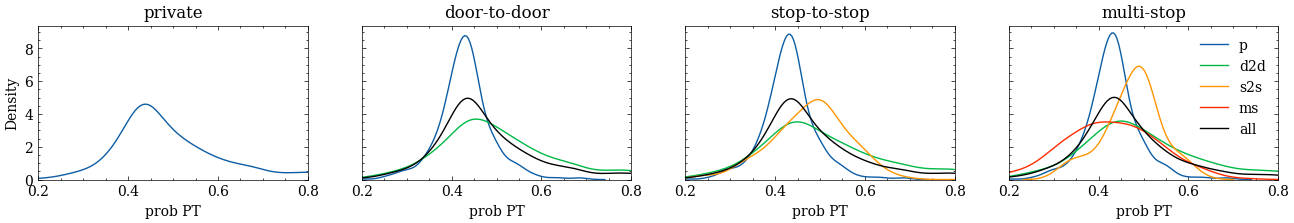

In [49]:
rm = inData.transitize.rm
fig, ax = plt.subplots(1,4, figsize = (16,2), sharey = True, sharex = True)
titles = ['private','door-to-door','stop-to-stop','multi-stop']
for level in [0,1,2,3]:
    df = inData.transitize.rm[inData.transitize.rm['solution_{}'.format(level)] ==1]
    beta = -0.2
    df['prob PT'] = 1-df.apply(lambda x: math.exp(beta*x.u)/
                             (math.exp(beta*x.u)+math.exp(beta*inData.transitize.requests.loc[x.traveller].u_PT)),
                             axis = 1)
    df['logsum'] = df.apply(lambda x:math.log(math.exp(beta*x.u)+
                                              math.exp(beta*inData.transitize.requests.loc[x.traveller].u_PT)) -
                            math.log(math.exp(beta*inData.transitize.requests.loc[x.traveller].u_PT)), axis =1)
    #df['rel']= df.apply(lambda x:(x.u-inData.transitize.requests.loc[x.traveller].u_0)/inData.transitize.requests.loc[x.traveller].u_0, axis =1)
    #df = inData.transitize.requests['u_{}'.format(i)-inData.transitize.requests.u_0
    for kind in df.kind.unique():
        sns.distplot(df[df.kind == kind]['prob PT'],label = kind, ax = ax[level], hist = False)
        #ylim = ax[level].get_ylim()
        #ax[level].plot([df[df.kind == kind]['prob PT'].mean(),df[df.kind == kind]['prob PT'].mean()], (0,5),color = 'black', lw = 3)
        #ax[level].set_ylim(ylim)
    if level>0:
        sns.distplot(df['prob PT'],label = 'all', ax = ax[level], hist = False, color = 'black')
    if level == 3:
        ax[3].legend()
    #if level <3:
    #     ax[level].get_legend().remove()
    ax[level].set_title(titles[level])
    ax[level].set_xlim((0.2,0.8))

AttributeError: 'AxesSubplot' object has no attribute 'is_first_col'

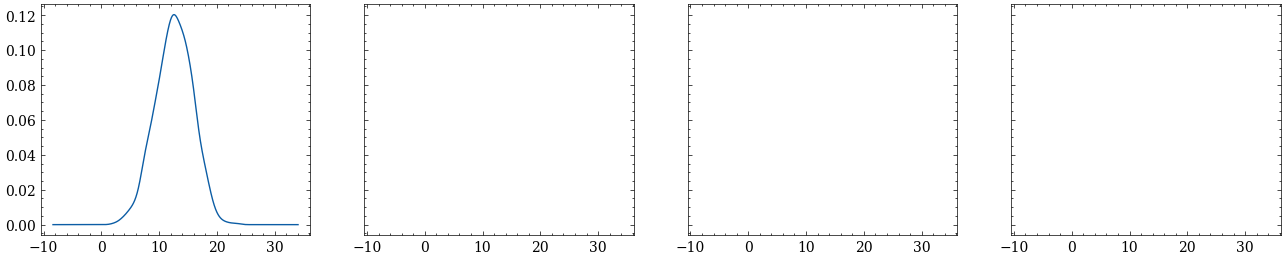

In [50]:
rm = inData.transitize.rm[inData.transitize.rm.selected>0]
fig, ax = plt.subplots(1,4, figsize = (16,3), sharey = True, sharex = True)
ax = ax.flatten()
cmap = plt.rcParams['axes.prop_cycle'].by_key()['color']
titles = ['private','door-to-door','stop-to-stop','multi-stop']
for level in [0,1,2,3]:

    solution = rm[rm['solution_{}'.format(level)] ==1].copy()
    #solution[solution.kind == 'ms'].u = solution[solution.kind == 'ms'].apply(lambda x: utility_s2s(x), axis =1) 
    solution['u_private'] = solution.apply(lambda x: rm[(rm.kind=='p')& (rm.traveller == x.traveller)].u.max(), axis =1)
    solution['$\Delta U$'] = np.minimum(0,(solution.u - solution.u_private ) / solution.u)
    for i, kind in enumerate(solution.kind.unique()):
        (solution[solution.kind==kind].VoT*3600).plot.kde(ax=ax[level], label = kind)
        ax[level].axvline((solution[solution.kind==kind].VoT*3600).mean(),0.75,1,lw = 2, color = cmap[i])
    ax[level].set_xlim(5,20)
    ax[level].set_ylim(0,0.140)
    #sns.histplot(data = solution, x = 'VoT', hue = 'kind', ax = ax[level], kde = True, alpha = 0.3, stat = 'percent')
    #sns.scatterplot(data = solution, x = 'VoT', y = '$\Delta U$', hue = 'kind' , 
    #                ax = ax[level])
    # sns.scatterplot(data = solution[solution.kind == 'p'], x = 'VoT', y = '$\Delta U$',
    #                 ax = ax[level], color = 'blue')
    
    ax[level].set_title(titles[level])
    if level ==3:
         ax[level].legend()

In [51]:
rm[(rm['solution_3'] ==1) & rm.kind =='ms']

,ride,traveller,degree,dist,ttrav,delay,u,orig_walk_time,dest_walk_time,VoT,...,treq,kind,s2s_reference,door_departure,fare,solution_0,solution_1,solution_2,solution_3,selected


In [81]:
inData.transitize.requests.u_PT

0        5.901823
1        1.577226
2        3.973414
3        1.619087
4       23.539382
          ...    
1995     2.921358
1996     8.733387
1997     9.834581
1998    14.974563
1999     1.753477
Name: u_PT, Length: 2000, dtype: float64